In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import umap
import plotly.express as px

from scipy.signal import find_peaks
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from straight_walking_speed import plot_straight_walking_speed
from os.path import join as oj

from get_trial_profile import get_trial_profile
from plot_decision_composition import plot_decision_composition

In [4]:
animal = 'RRM028'
session = 'Day123'
root_folder = r'/Users/yang/Documents/Wilbrecht_Lab/data4analysis/processed_tracks'

# following code block is used to extract assigned animal and session

'''
animal_folder = oj(root_folder, animal)

dataframes = []

# Check if the animal folder exists
if os.path.isdir(animal_folder):
    session_folder = oj(animal_folder, session)
    if os.path.isdir(session_folder):
        for filename in os.listdir(session_folder):
            if filename.startswith(f'{animal}_{session}') and filename.endswith('tracks_processed.csv'):
                file_path = oj(session_folder, filename)
                df = pd.read_csv(file_path, index_col=False)
                dataframes.append(df)
    else:
        print('No matching session folder found.')
else:
    print('No matching animal folder found.')

if dataframes:
    combined_df = pd.concat(dataframes, axis=0, ignore_index=True).reset_index(drop=True)
else:
    print("No matching files found.")
'''

# following code is used to read the existing super_df
combined_df = pd.read_csv(oj(root_folder, 'combined_df.csv'), index_col=False)

In [5]:
print(combined_df.shape)
combined_df.head()


(1726631, 50)


Head x     Head y      Neck x     Neck y     Torso x    Torso y  \
0  192.796951  28.332069  195.778046  23.389879  199.605362  11.785733   
1  192.110931  35.688915  195.196640  28.520031  199.130478  16.665558   
2  191.869446  43.421238  192.651031  36.414017  196.267807  24.506279   
3  191.725861  48.858665  192.430756  43.865223  195.759293  32.090069   
4  191.152802  56.947693  191.896271  51.915794  195.551804  39.622505   

   Tailhead x  Tailhead y  warped Head x  warped Head y  ...  \
0  203.450699    6.817648     273.703649     130.625305  ...   
1  203.038986    7.328142     274.235963     124.023690  ...   
2  199.963287   12.590609     274.606919     117.536312  ...   
3  199.434418   20.331448     275.048460     111.118353  ...   
4  199.436478   27.578400     276.035795     104.365713  ...   

   Head acceleration x  Head acceleration y  Neck acceleration x  \
0             0.000000             0.000000             0.000000   
1             0.000000             0.000000             0.000000   
2          -145.221031           102.813562           -14.890194   
3            63.526265            62.476983          -178.058160   
4           491.214400          -301.211961           -91.454126   

   Neck acceleration y  Torso acceleration x  Torso acceleration y  \
0             0.000000              0.000000              0.000000   
1             0.000000              0.000000              0.000000   
2         -2011.030788           1949.717732           -307.097779   
3           106.210530          -1884.260791           -310.515490   
4          -308.461398           -241.355822           -196.065429   

   Tailhead acceleration x  Tailhead acceleration y  animal  session  
0                 0.000000                 0.000000  RRM028   Day141  
1                 0.000000                 0.000000  RRM028   Day141  
2               252.082828             -3626.994766  RRM028   Day141  
3              -390.443987             -2055.812005  RRM028   Day141  
4               -67.807066               221.092808  RRM028   Day141  

[5 rows x 50 columns]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


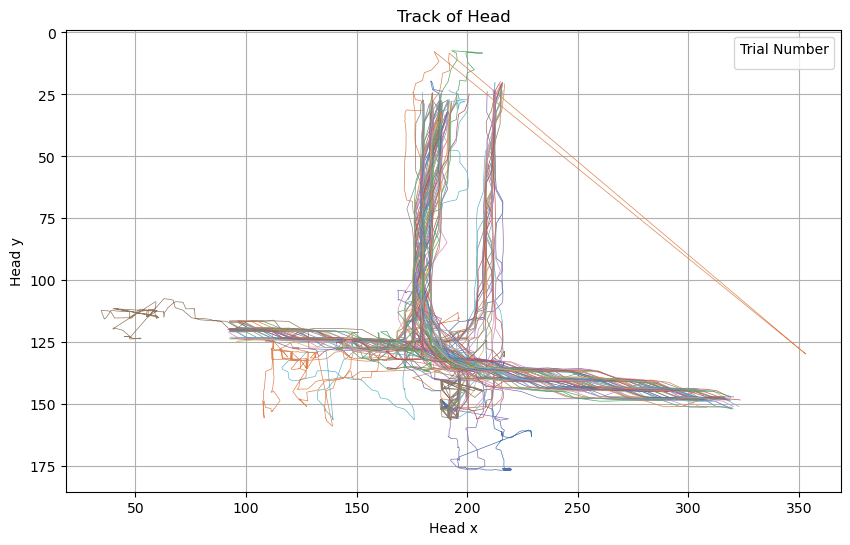

In [6]:
# Define the start and stop frames
start_frame, stop_frame = 0, 10000

# Filter the dataframe for the specified frame range
filtered_df = combined_df.iloc[start_frame:stop_frame]

plt.figure(figsize=(10, 6))

palette = sns.color_palette('deep', n_colors=len(filtered_df['trial'].unique()))

for color, (trial_num, group) in zip(palette, filtered_df.groupby('trial')):
    sns.lineplot(
        data=group,
        x='Head x',
        y='Head y',
        color=color,
        linewidth=0.5,
        legend=False,
        sort=False
    )

plt.xlabel('Head x')
plt.ylabel('Head y')
plt.title('Track of Head')
plt.legend(title='Trial Number', loc='upper right')
plt.grid(True)

# Invert y-axis to match the video coordinate system
plt.gca().invert_yaxis()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


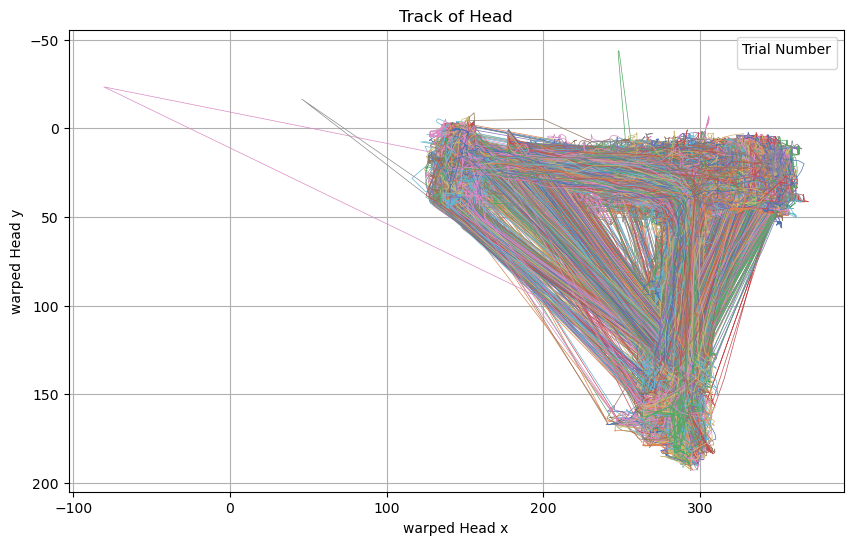

In [7]:
# Define the start and stop frames
start_frame, stop_frame = 0, 1600000

# Filter the dataframe for the specified frame range
filtered_df = combined_df.iloc[start_frame:stop_frame]

plt.figure(figsize=(10, 6))

palette = sns.color_palette('deep', n_colors=len(filtered_df['trial'].unique()))

for color, (trial_num, group) in zip(palette, filtered_df.groupby('trial')):
    sns.lineplot(
        data=group,
        x='warped Head x',
        y='warped Head y',
        color=color,
        linewidth=0.5,
        legend=False,
        sort=False
    )

plt.xlabel('warped Head x')
plt.ylabel('warped Head y')
plt.title('Track of Head')
plt.legend(title='Trial Number', loc='upper right')
plt.grid(True)

# Invert y-axis to match the video coordinate system
plt.gca().invert_yaxis()

plt.show()

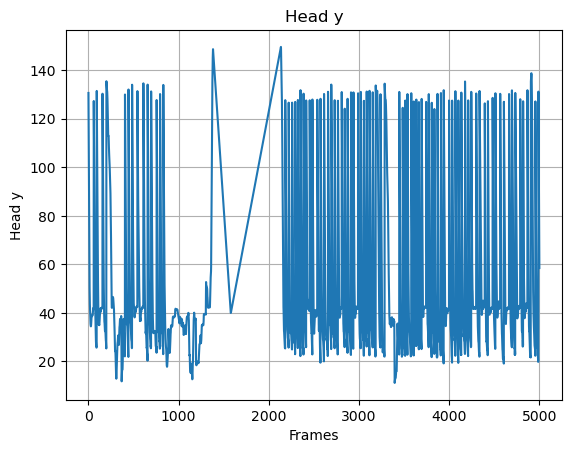

In [8]:
plot_df = combined_df[0:5000]
sns.lineplot(data=plot_df, x=plot_df.index, y='warped Head y')
plt.title('Head y')
plt.xlabel('Frames')
plt.ylabel('Head y')
#plt.xlim(0, )
plt.grid(True)
plt.show()


In [9]:
'''
# Extracting the data to be analyzed
data = df['Head yCoordinates']

# Detecting peaks
peaks, _ = find_peaks(data)

# Extracting peak values
peak_values = data[peaks]

# Plotting the data with peaks highlighted
plt.figure(figsize=(15, 6))
sns.lineplot(data=data)
plt.plot(peaks, peak_values, "x")  # Highlight peaks with 'x'
plt.show()
'''

'\n# Extracting the data to be analyzed\ndata = df[\'Head yCoordinates\']\n\n# Detecting peaks\npeaks, _ = find_peaks(data)\n\n# Extracting peak values\npeak_values = data[peaks]\n\n# Plotting the data with peaks highlighted\nplt.figure(figsize=(15, 6))\nsns.lineplot(data=data)\nplt.plot(peaks, peak_values, "x")  # Highlight peaks with \'x\'\nplt.show()\n'

In [10]:
# distribution of straight walking length (movement before T_Entry)
current_trial_num = np.nan
current_decision = np.nan
decision = np.nan
length = 0

straight_walking_length = []
trials = []
current_trial_speeds = []
current_trial_coords = []

for index, row in combined_df.iterrows():
    trial_num = row['trial']
    decision = row['decision']
    speed = np.sqrt(row['Head velocity x']**2 + row['Head velocity y']**2)
    head_x = row['warped Head x']
    head_y = row['warped Head y']
    
    if not pd.isna(decision):
        current_decision = decision    
        
    if trial_num != current_trial_num: # End of current trial and start of a new trial
        if length < 100:
            straight_walking_length.append(length)
            current_decision = np.nan
            current_trial_num = trial_num
        length = 0
        
    if pd.isna(current_decision) and index != 0:
        if speed < 300:
            length += 1

straight_walking_length_df = pd.DataFrame(straight_walking_length)
plt.figure(figsize=(10, 6))
plt.hist(straight_walking_length_df, bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Straight Walking Length')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

KeyError: 'Head velocity'

In [ ]:
straight_walking_speed_profiles = get_trial_profile(combined_df)
#plot_straight_walking_speed(straight_walking_speed_list[:50])
straight_walking_speed_profiles.head()

speed 1     speed 2     speed 3     speed 4     speed 5     speed 6  \
0  163.179690  243.279027  243.220136  235.265702  236.947653  217.137144   
1  219.060795  236.300744  247.142233  170.836154  228.301812  224.144884   
2  169.694832  214.304225  180.170163  217.346008  221.269714  138.102614   
3  217.243432  164.629899  228.652752  233.676800  223.596193  142.595766   
4   99.526224  105.332385   38.762046  130.252871  112.998078  119.547882   

      speed 7     speed 8     speed 9    speed 10  ...          x9         y9  \
0  184.034594  236.124817  222.461459  135.185175  ...  284.730044  64.460354   
1  227.222506  142.646678  134.634360  162.106368  ...  283.109450  65.014807   
2  214.483118  179.250025  223.361606  161.322440  ...  288.076108  67.150784   
3  176.815739  200.836100  147.853495  197.544288  ...  289.370524  65.524698   
4  131.968939  124.811610  109.366056  124.638089  ...  282.831745  64.342432   

          x10        y10         x11        y11         x12        y12  \
0  286.347218  58.776239  287.613997  54.010870  289.272027  50.212979   
1  283.767394  60.611696  285.400073  55.937098  286.407122  51.016905   
2  288.429964  61.632167  288.590266  56.818179  288.827450  52.719948   
3  289.478691  60.225681  289.380885  55.099283  289.664211  50.758991   
4  282.798908  60.724536  282.903579  57.059193  283.307836  53.313734   

          x13        y13  
0  291.041227  47.274656  
1  285.977186  46.911997  
2  288.879932  49.043283  
3  290.242585  47.050286  
4  284.253587  49.523770  

[5 rows x 40 columns]

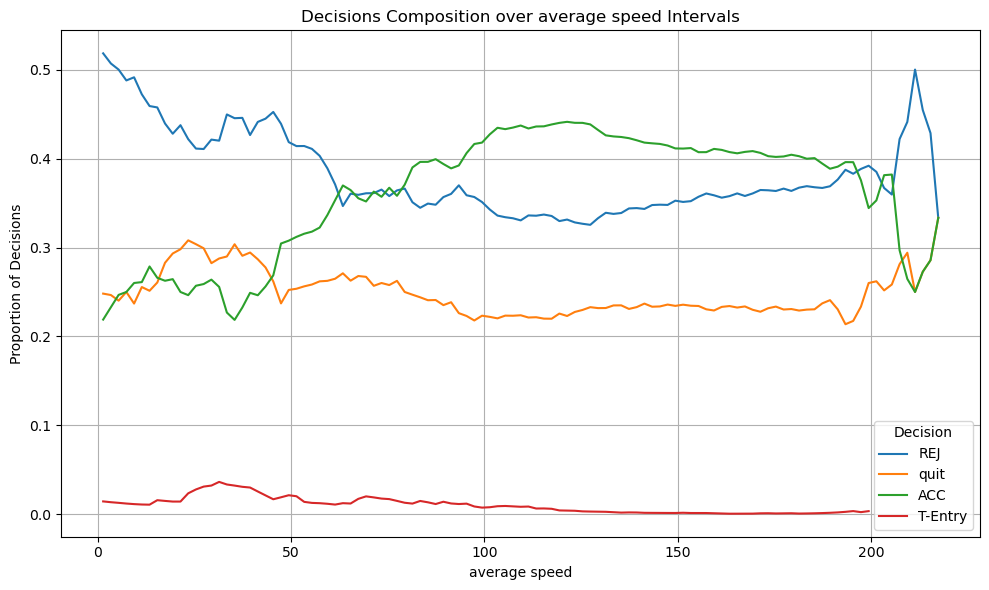

In [ ]:
plot_decision_composition(straight_walking_speed_profiles, column='average speed', window_size=30, step_size=2)

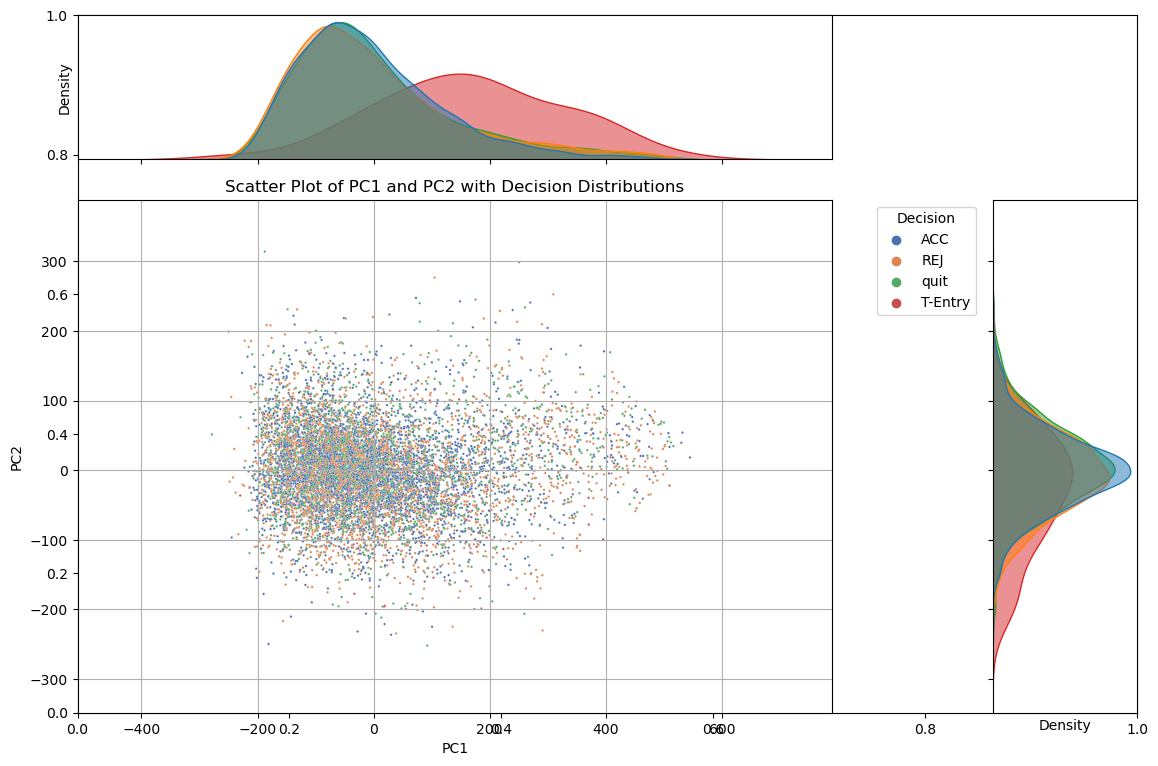

In [ ]:
pca_columns=[f'speed {i+1}' for i in range(12)]

"""
Performs PCA on the coordinate columns of the DataFrame and adds the principal components to the DataFrame.

Parameters:
df (pandas.DataFrame): The input DataFrame containing the coordinate data.
coord_columns (list): List of coordinate column names to include in PCA.
n_components (int): Number of principal components to extract.

Returns:
pandas.DataFrame: The DataFrame with the principal components added.
"""
# Extract the coordinate data
coords_data = straight_walking_speed_profiles[pca_columns]

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(coords_data)

# Create a DataFrame for the principal components
pc_columns = [f'PC{i+1}' for i in range(2)]
pc_df = pd.DataFrame(principal_components, columns=pc_columns)

# Add the principal components to the original DataFrame
speed_pca = pd.concat([straight_walking_speed_profiles.reset_index(drop=True), pc_df.reset_index(drop=True)], axis=1)

"""
Plots the PCA results, including a scatter plot of PC1 and PC2 and the variance explained by each PC.

Parameters:
df_with_pcs (pandas.DataFrame): The DataFrame with the principal components.
pca (PCA): The fitted PCA object.
decision_column (str): The column name for decisions to color the scatter plot.
"""
# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(12, 8))

# Create gridspec for layout
from matplotlib.gridspec import GridSpec
gs = GridSpec(4, 4, figure=fig)
main_ax = fig.add_subplot(gs[1:, :-1])
x_hist = fig.add_subplot(gs[0, :-1], sharex=main_ax)
y_hist = fig.add_subplot(gs[1:, -1], sharey=main_ax)

# Scatter plot of PC1 and PC2
sns.scatterplot(data=speed_pca, x='PC1', y='PC2', hue='final decision', palette='deep', s=3, ax=main_ax)

main_ax.set_xlabel('PC1')
main_ax.set_ylabel('PC2')
main_ax.set_title('Scatter Plot of PC1 and PC2 with Decision Distributions')
main_ax.legend(title='Decision', bbox_to_anchor=(1.05, 1), loc='upper left')
main_ax.grid(True)

# New Code: KDE plot for the distribution of different decisions' points along PC1
sns.kdeplot(data=speed_pca, x='PC1', hue='final decision', fill=True, alpha=0.5, common_norm=False, legend=False, ax=x_hist)
x_hist.set_ylabel('Density')
x_hist.set_xlabel('')
x_hist.set_yticks([])

# New Code: KDE plot for the distribution of different decisions' points along PC2
sns.kdeplot(data=speed_pca, y='PC2', hue='final decision', fill=True, alpha=0.5, common_norm=False, legend=False, ax=y_hist)
y_hist.set_xlabel('Density')
y_hist.set_ylabel('')
y_hist.set_xticks([])

# Adjust layout
plt.setp(x_hist.get_xticklabels(), visible=False)
plt.setp(y_hist.get_yticklabels(), visible=False)
plt.tight_layout()
plt.show()

In [ ]:
pca_columns = [f'speed {i+1}' for i in range(12)]

"""
Performs UMAP on the coordinate columns of the DataFrame and adds the UMAP components to the DataFrame.

Parameters:
df (pandas.DataFrame): The input DataFrame containing the coordinate data.
coord_columns (list): List of coordinate column names to include in UMAP.
n_components (int): Number of UMAP components to extract.

Returns:
pandas.DataFrame: The DataFrame with the UMAP components added.
"""
# Extract the coordinate data
coords_data = straight_walking_speed_profiles[pca_columns]

# Perform UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
umap_components = reducer.fit_transform(coords_data)

# Create a DataFrame for the UMAP components
umap_columns = [f'UMAP{i+1}' for i in range(2)]
umap_df = pd.DataFrame(umap_components, columns=umap_columns)

# Add the UMAP components to the original DataFrame
speed_umap = pd.concat([straight_walking_speed_profiles.reset_index(drop=True), umap_df.reset_index(drop=True)], axis=1)

"""
Plots the UMAP results, including a scatter plot of UMAP1 and UMAP2.

Parameters:
df_with_umap (pandas.DataFrame): The DataFrame with the UMAP components.
umap (UMAP): The fitted UMAP object.
decision_column (str): The column name for decisions to color the scatter plot.
"""
# Use Plotly Express for the main scatter plot
fig = px.scatter(speed_umap, x='UMAP1', y='UMAP2', color='final decision',
                 title='Scatter Plot of UMAP1 and UMAP2 with Decision Distributions',
                 labels={'UMAP1': 'UMAP1', 'UMAP2': 'UMAP2'},
                 hover_data=['final decision'])
fig.update_traces(marker=dict(size=4))
fig.show()

/opt/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



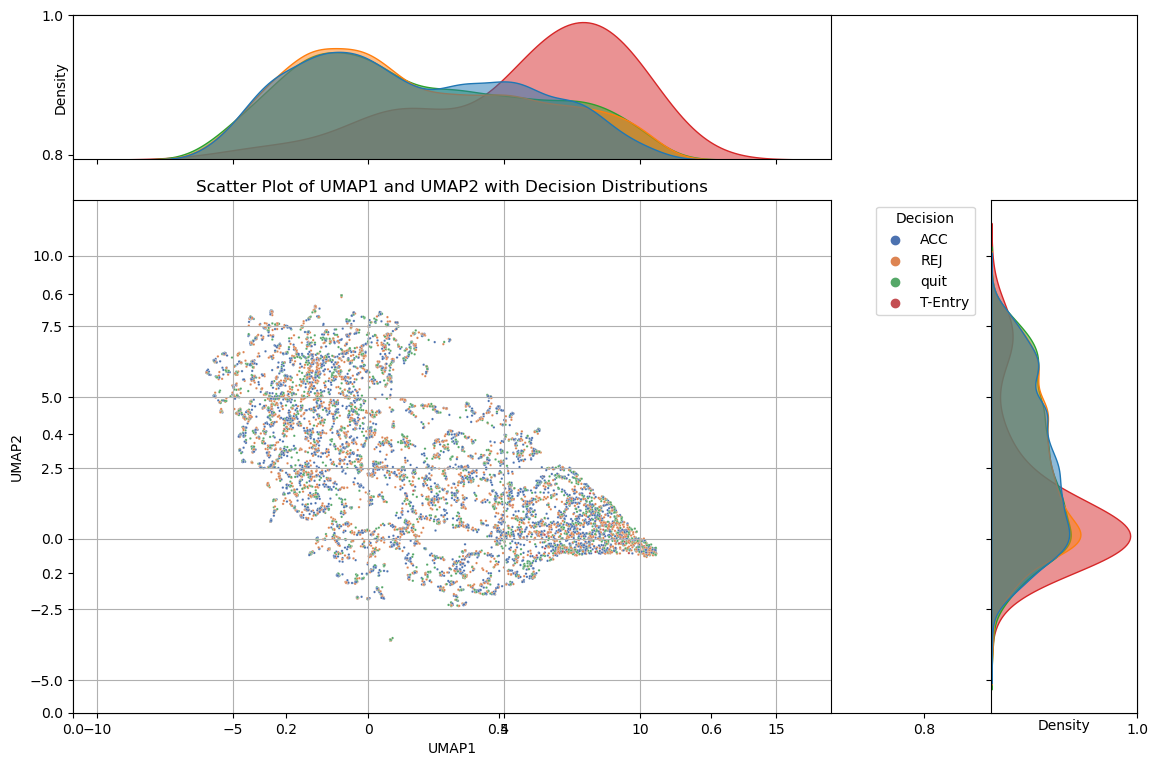

In [ ]:
# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(12, 8))

# Create gridspec for layout
gs = GridSpec(4, 4, figure=fig)
main_ax = fig.add_subplot(gs[1:, :-1])
x_hist = fig.add_subplot(gs[0, :-1], sharex=main_ax)
y_hist = fig.add_subplot(gs[1:, -1], sharey=main_ax)

# KDE plot of UMAP1 and UMAP2
sns.scatterplot(data=speed_umap, x='UMAP1', y='UMAP2', hue='final decision', palette='deep', s=3, ax=main_ax)

main_ax.set_xlabel('UMAP1')
main_ax.set_ylabel('UMAP2')
main_ax.set_title('Scatter Plot of UMAP1 and UMAP2 with Decision Distributions')
main_ax.legend(title='Decision', bbox_to_anchor=(1.05, 1), loc='upper left')
main_ax.grid(True)

# KDE plot for the distribution of different decisions' points along UMAP1
sns.kdeplot(data=speed_umap, x='UMAP1', hue='final decision', fill=True, alpha=0.5, common_norm=False, legend=False, ax=x_hist)
x_hist.set_ylabel('Density')
x_hist.set_xlabel('')
x_hist.set_yticks([])

# KDE plot for the distribution of different decisions' points along UMAP2
sns.kdeplot(data=speed_umap, y='UMAP2', hue='final decision', fill=True, alpha=0.5, common_norm=False, legend=False, ax=y_hist)
y_hist.set_xlabel('Density')
y_hist.set_ylabel('')
y_hist.set_xticks([])

# Adjust layout
plt.setp(x_hist.get_xticklabels(), visible=False)
plt.setp(y_hist.get_yticklabels(), visible=False)
plt.tight_layout()
plt.show()

In [ ]:
# Define the trajectory columns
pca_columns = [f'x{i}' for i in range(1, 14)] + [f'y{i}' for i in range(1, 14)]

# Extract the coordinate data
coords_data = straight_walking_speed_profiles[pca_columns]

# Perform UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
umap_components = reducer.fit_transform(coords_data)

# Create a DataFrame for the UMAP components
umap_columns = [f'UMAP{i+1}' for i in range(2)]
umap_df = pd.DataFrame(umap_components, columns=umap_columns)

# Add the UMAP components to the original DataFrame
coords_umap = pd.concat([straight_walking_speed_profiles.reset_index(drop=True), umap_df.reset_index(drop=True)], axis=1)

# Apply K-means clustering to UMAP components
kmeans = KMeans(n_clusters=5, random_state=42).fit(umap_df)

# Add cluster labels to the DataFrame
coords_umap['Cluster'] = kmeans.labels_

# Scatter plot of UMAP1 and UMAP2 with decisions using Plotly
fig = px.scatter(coords_umap, x='UMAP1', y='UMAP2', color='final decision',
                 title='Scatter Plot of UMAP1 and UMAP2 with Decision Distributions',
                 labels={'UMAP1': 'UMAP1', 'UMAP2': 'UMAP2'},
                 hover_data=['final decision'])
fig.update_traces(marker=dict(size=3))
fig.show()

# Scatter plot of UMAP1 and UMAP2 with clusters using Plotly
fig = px.scatter(coords_umap, x='UMAP1', y='UMAP2', color='Cluster',
                 title='Clusters on UMAP1 and UMAP2',
                 labels={'UMAP1': 'UMAP1', 'UMAP2': 'UMAP2'},
                 hover_data=['Cluster'])
fig.update_traces(marker=dict(size=3))
fig.show()

/opt/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



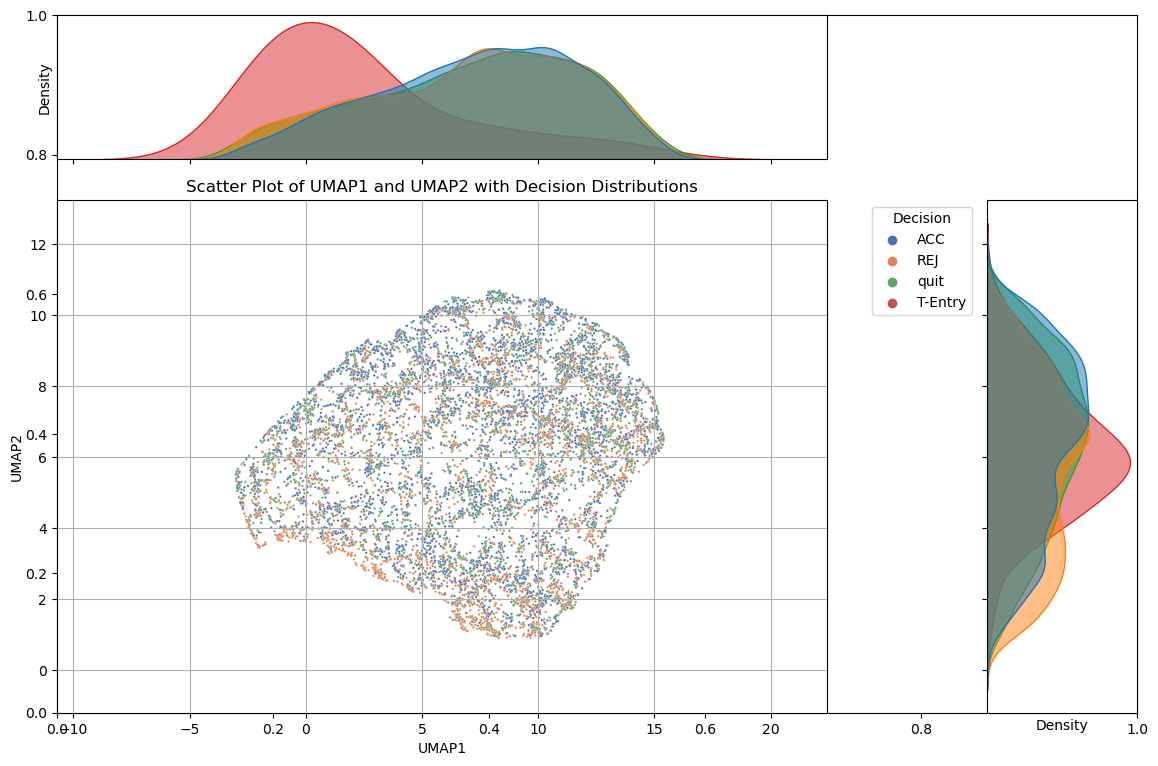

In [ ]:
# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(12, 8))

# Create gridspec for layout
gs = GridSpec(4, 4, figure=fig)
main_ax = fig.add_subplot(gs[1:, :-1])
x_hist = fig.add_subplot(gs[0, :-1], sharex=main_ax)
y_hist = fig.add_subplot(gs[1:, -1], sharey=main_ax)

# KDE plot of UMAP1 and UMAP2
sns.scatterplot(data=coords_umap, x='UMAP1', y='UMAP2', hue='final decision', palette='deep', s=3, ax=main_ax)

main_ax.set_xlabel('UMAP1')
main_ax.set_ylabel('UMAP2')
main_ax.set_title('Scatter Plot of UMAP1 and UMAP2 with Decision Distributions')
main_ax.legend(title='Decision', bbox_to_anchor=(1.05, 1), loc='upper left')
main_ax.grid(True)

# KDE plot for the distribution of different decisions' points along UMAP1
sns.kdeplot(data=coords_umap, x='UMAP1', hue='final decision', fill=True, alpha=0.5, common_norm=False, legend=False, ax=x_hist)
x_hist.set_ylabel('Density')
x_hist.set_xlabel('')
x_hist.set_yticks([])

# KDE plot for the distribution of different decisions' points along UMAP2
sns.kdeplot(data=coords_umap, y='UMAP2', hue='final decision', fill=True, alpha=0.5, common_norm=False, legend=False, ax=y_hist)
y_hist.set_xlabel('Density')
y_hist.set_ylabel('')
y_hist.set_xticks([])

# Adjust layout
plt.setp(x_hist.get_xticklabels(), visible=False)
plt.setp(y_hist.get_yticklabels(), visible=False)
plt.tight_layout()
plt.show()

PC1 = -0.231 * x1 + -0.264 * x2 + -0.290 * x3 + -0.320 * x4 + -0.332 * x5 + -0.332 * x6 + -0.327 * x7 + -0.309 * x8 + -0.302 * x9 + -0.273 * x10 + -0.243 * x11 + -0.209 * x12


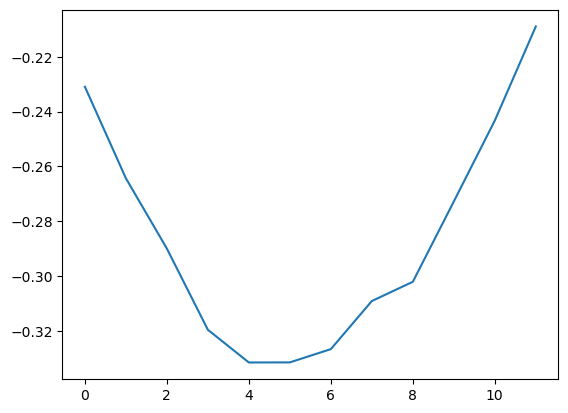

In [ ]:
# Output the expression of PC1
pc1_expression = " + ".join([f"{coef:.3f} * {col}" for coef, col in zip(pca.components_[0], pca_columns)])
print(f"PC1 = {pc1_expression}")
plt.plot(pca.components_[0])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



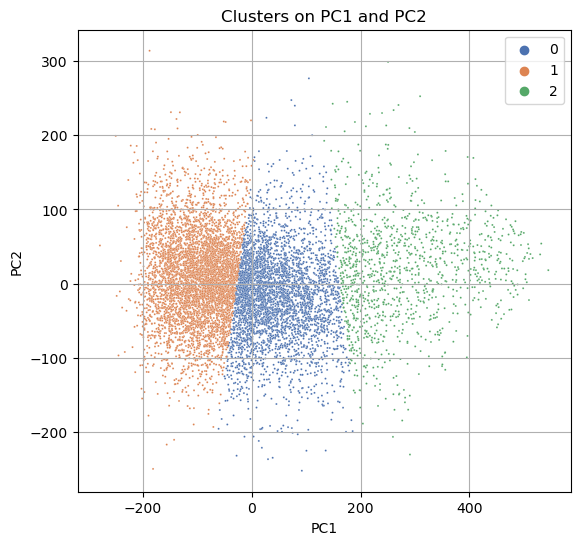

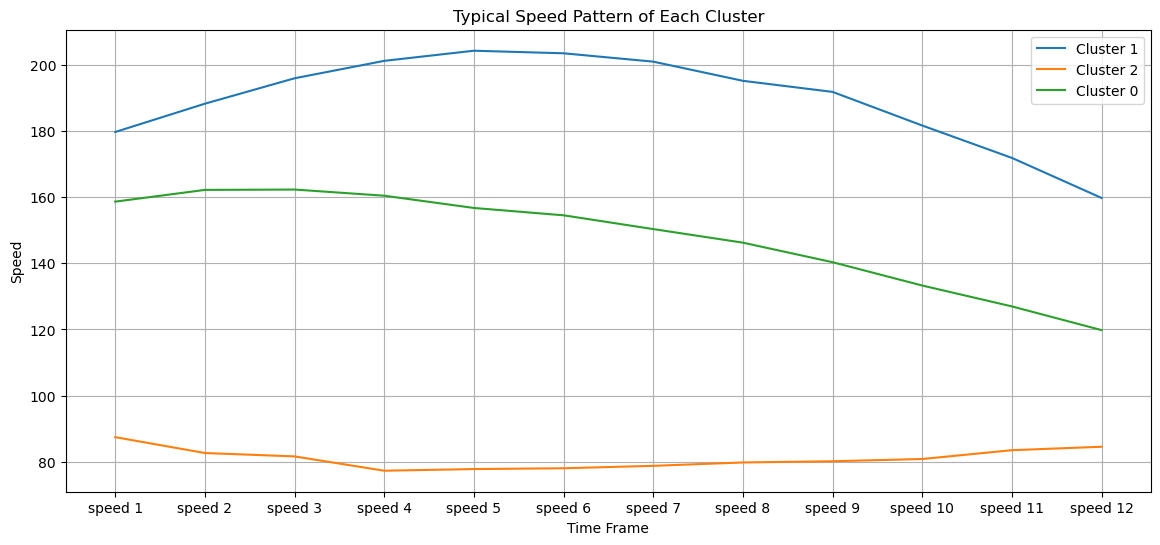

In [ ]:

"""
Clusters the PCA-transformed data using K-means and adds cluster labels to the DataFrame.

Parameters:
df_with_pcs (pandas.DataFrame): The DataFrame with principal components.
n_clusters (int): The number of clusters to form.

Returns:
pandas.DataFrame: The DataFrame with cluster labels added.
"""
# Extract the PCA columns
pca_columns = ['PC1', 'PC2']
pca_data = speed_pca[pca_columns]

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(pca_data)

# Add cluster labels to the DataFrame
speed_pca['Cluster'] = kmeans.labels_


"""
Plots the PCA results with clusters and decision labels.

Parameters:
df_with_pcs (pandas.DataFrame): The DataFrame with principal components and cluster labels.
decision_column (str): The column name for decisions to color the scatter plot.
"""
# Scatter plot of PC1 and PC2 with clusters
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
clusters = speed_pca['Cluster'].unique()
sns.scatterplot(data=speed_pca, x='PC1', y='PC2', hue='Cluster', palette='deep', s=2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters on PC1 and PC2')
plt.legend()
plt.grid(True)
plt.show()

# Plot the typical speed pattern of each cluster
"""
Plots the typical speed pattern for each cluster.

Parameters:
speed_pca (pandas.DataFrame): The DataFrame with speed profiles and cluster labels.
"""
plt.figure(figsize=(14, 6))

for cluster in clusters:
    cluster_data = speed_pca[speed_pca['Cluster'] == cluster]
    mean_speed_pattern = cluster_data[[f'speed {i+1}' for i in range(12)]].mean()
    plt.plot(mean_speed_pattern, label=f'Cluster {cluster}')

plt.xlabel('Time Frame')
plt.ylabel('Speed')
plt.title('Typical Speed Pattern of Each Cluster')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Function to calculate the slope and intercept for each trial using sklearn
def calculate_slope_intercept(df):
    slopes = []
    intercepts = []

    for index, row in df.iterrows():
        x_coords = row[[f'x{i+1}' for i in range(13)]].values.reshape(-1, 1)
        y_coords = row[[f'y{i+1}' for i in range(13)]].values.reshape(-1, 1)
        
        # Perform linear regression using sklearn
        reg = LinearRegression().fit(y_coords, x_coords)
        slope = reg.coef_[0][0]
        intercept = reg.intercept_[0]
        
        slopes.append(slope)
        intercepts.append(intercept)
    
    df['slope'] = slopes
    df['intercept'] = intercepts

    return df

# Apply the function to the DataFrame
straight_walking_speed_profiles = calculate_slope_intercept(straight_walking_speed_profiles)

Text(0, 0.5, 'trial counts')

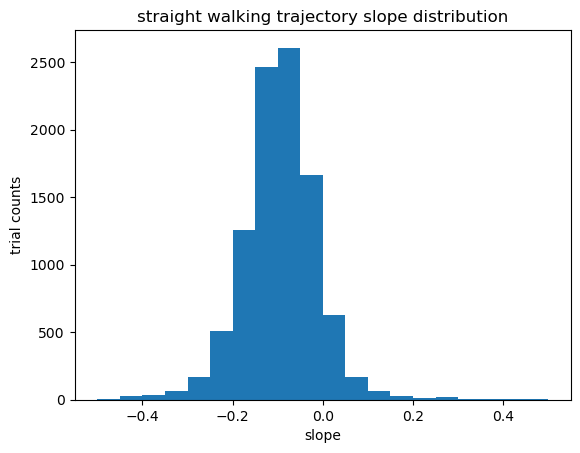

In [ ]:
plt.hist(straight_walking_speed_profiles['slope'], bins=20, range=(-0.5, 0.5))
plt.title('straight walking trajectory slope distribution')
plt.xlabel('slope')
plt.ylabel('trial counts')

In [ ]:
print(straight_walking_speed_profiles.shape)
straight_walking_speed_profiles.describe()

(9847, 42)


speed 1      speed 2      speed 3      speed 4      speed 5  \
count  9847.000000  9847.000000  9847.000000  9847.000000  9847.000000   
mean    160.708540   165.777732   169.562708   170.990806   171.194433   
std      50.914776    52.626230    53.114367    54.545655    54.972888   
min       0.102447     0.282301     0.354080     0.316003     0.280651   
25%     131.780675   134.827340   137.449263   137.821560   136.871507   
50%     151.806441   158.034673   161.960151   164.842918   164.890786   
75%     206.765095   212.697116   215.815375   218.318493   219.282737   
max     346.650474   499.823568   334.231945   356.012932   482.655033   

           speed 6      speed 7      speed 8      speed 9     speed 10  ...  \
count  9847.000000  9847.000000  9847.000000  9847.000000  9847.000000  ...   
mean    169.994900   167.239603   162.895517   159.023134   151.325079  ...   
std      54.630325    54.507518    53.829877    54.221078    52.981811  ...   
min       0.114036     0.073385     0.091375     0.073701     0.207356  ...   
25%     135.358244   133.355561   130.824608   126.927216   123.018458  ...   
50%     163.048741   159.591121   154.860494   151.175427   144.891329  ...   
75%     218.359726   215.995352   212.266429   210.287831   199.610428  ...   
max     351.263415   348.970475   339.279696   337.805634   496.278041  ...   

               x10          y10          x11          y11          x12  \
count  9847.000000  9847.000000  9847.000000  9847.000000  9847.000000   
mean    293.483614    61.120341   294.111842    56.418587   294.799161   
std       5.177489     4.848794     5.243520     3.632779     5.398041   
min     193.280118    46.021938   192.874192    46.080660   192.468265   
25%     289.834978    58.140548   290.361928    54.064915   291.043849   
50%     294.774441    61.438317   295.236541    56.484134   295.736937   
75%     297.421738    64.346541   298.450825    58.760133   299.013775   
max     308.114230   158.961250   308.366857   163.308874   308.203588   

               y12          x13          y13        slope    intercept  
count  9847.000000  9847.000000  9847.000000  9847.000000  9847.000000  
mean     52.005402   295.455916    47.921808    -0.097338   299.591937  
std       2.563737     5.672236     1.747702     0.172105    10.261441  
min      46.029552   192.062339    46.000117    -6.220459   107.839284  
25%      50.312720   292.127423    46.722540    -0.142617   295.622565  
50%      51.864552   296.288817    47.565327    -0.094006   300.103909  
75%      53.511418   299.656532    49.048344    -0.045426   304.176512  
max     160.789507   307.795845   130.276284     3.619406   582.272226  

[8 rows x 41 columns]

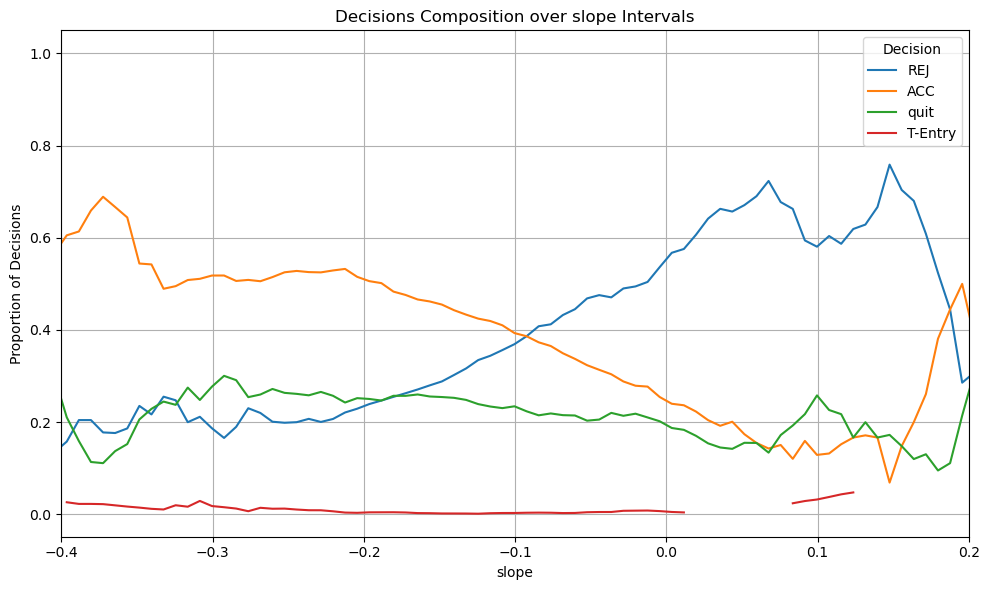

In [ ]:
plot_decision_composition(straight_walking_speed_profiles, column='slope', window_size=0.05, step_size=0.008, x_range=(-0.4, 0.2))

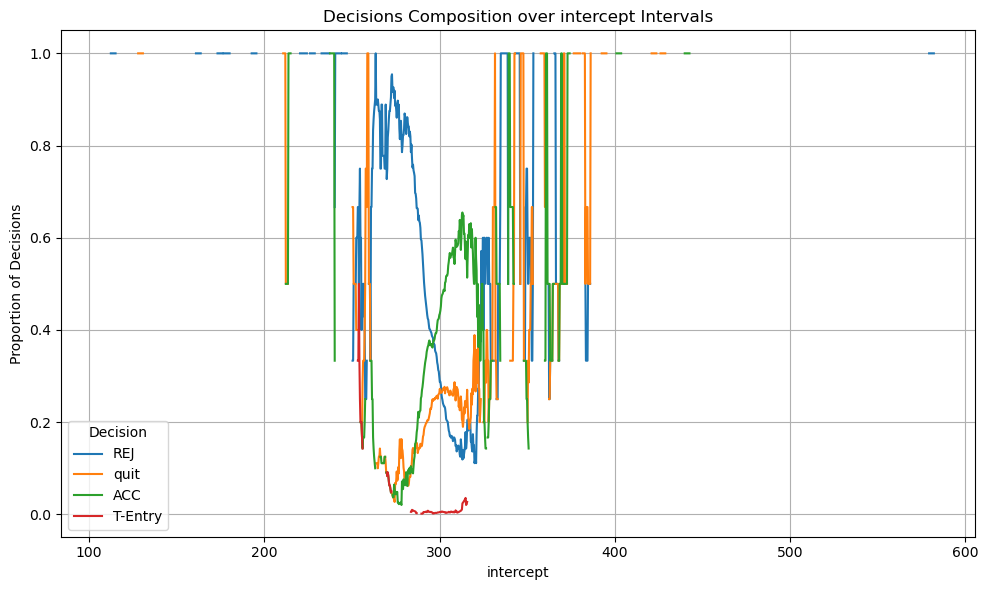

In [ ]:
plot_decision_composition(straight_walking_speed_profiles, column='intercept', window_size=3, step_size=0.3)